In [1]:
#importing all librabries

import numpy as np
import pandas as pd
import statsmodels.api as sns
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

In [2]:
 #loading data
    
df=pd.read_csv(r"C:\Users\keert\Downloads\train.csv")

In [4]:
#Reading data

df.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978,NaN,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,NaN,NaN
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102,NaN,NaN
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302,NaN,NaN
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374,NaN,NaN


In [5]:
df.shape

(3198, 19)

In [6]:
df.describe()   #numerical features

,subscriber,Trend_day_count,Unnamed: 17
count,3.175000e+03,3197.000000,1.0
mean,3.823981e+06,7.964342,2544.0
std,2.865771e+07,78.556055,NaN
min,0.000000e+00,0.000000,2544.0
25%,2.428800e+05,4.000000,2544.0
50%,1.241220e+06,7.000000,2544.0
75%,3.812622e+06,10.000000,2544.0
max,1.576229e+09,4444.000000,2544.0


In [7]:
df.dtypes

Video_id                  object
category_id               object
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                 object
Trend_tag_count           object
comment_count             object
comment_disabled          object
like dislike disabled     object
likes                     object
dislike                   object
tag appered in title      object
views                     object
Unnamed: 17              float64
Unnamed: 18               object
dtype: object

In [8]:
df.describe(include='all')

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
count,3198,3192,3195,3.175000e+03,3195,3046,3133,3197.000000,3197,3197,3198,3198,3198,3198,3198,3197,3198,1.0,1
unique,3198,17,1501,NaN,3191,2946,3097,NaN,22,10,2174,3,3,2210,2155,2,3194,NaN,1
top,HDR9SQc79,24,The Tonight Show Starring Jimmy Fallon,NaN,Sia - Ho Ho Ho,The Late Show|Stephen Colbert|Colbert|Late Sho...,Jukin Media Verified (Original) * For licensin...,NaN,24,6,,TRUE,FALSE,0,0,True,858323,NaN,False
freq,1,786,34,NaN,2,25,10,NaN,217,475,1015,2182,2354,843,844,2108,2,NaN,1
mean,NaN,NaN,NaN,3.823981e+06,NaN,NaN,NaN,7.964342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2544.0,NaN
std,NaN,NaN,NaN,2.865771e+07,NaN,NaN,NaN,78.556055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2544.0,NaN
25%,NaN,NaN,NaN,2.428800e+05,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2544.0,NaN
50%,NaN,NaN,NaN,1.241220e+06,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2544.0,NaN
75%,NaN,NaN,NaN,3.812622e+06,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2544.0,NaN


In [15]:
#Finding the unique values of columns
df.nunique()

Video_id                 3198
category_id                17
channel_title            1501
subscriber               1452
title                    3191
tags                     2946
description              3097
Trend_day_count            14
Tag_count                  22
Trend_tag_count            10
comment_count            2174
comment_disabled            3
like dislike disabled       3
likes                    2210
dislike                  2155
tag appered in title        2
views                    3194
Unnamed: 17                 1
Unnamed: 18                 1
dtype: int64

C:\Users\keert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='subscriber', ylabel='Density'>

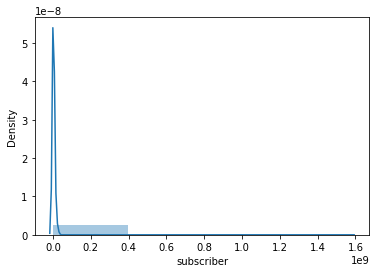

In [16]:
#Univarient Analysis
#Distrubution of subscriber

sn.distplot(df['subscriber'],bins=4)

In [17]:
# Pulling out names of numerical variables by conditioning dtypes NOT equal to object type
numerical_features = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))

Number of Numerical features:  3
Index(['subscriber', 'Trend_day_count', 'Unnamed: 17'], dtype='object')
Number of Categorical features:  16


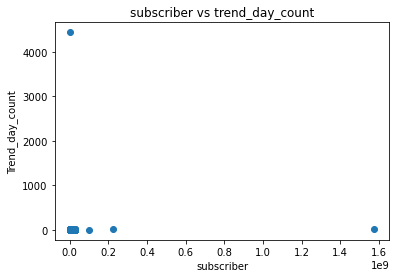

In [18]:
#Bivarient Analysis
plt.scatter(df['subscriber'],df['Trend_day_count'])
plt.title('subscriber vs trend_day_count')
plt.xlabel('subscriber')
plt.ylabel('Trend_day_count')
plt.show()

<AxesSubplot:>

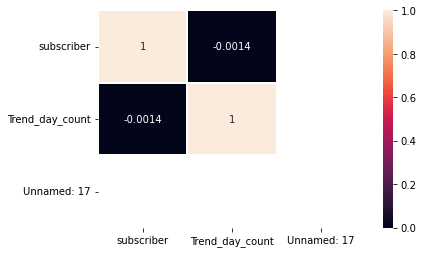

In [35]:
sn.heatmap(df.corr(),annot=True,linewidth=0.3)

In [19]:
#Performing EDA
#Finding the Missing data
df.isnull().sum()



Video_id                    0
category_id                 6
channel_title               3
subscriber                 23
title                       3
tags                      152
description                65
Trend_day_count             1
Tag_count                   1
Trend_tag_count             1
comment_count               0
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        1
views                       0
Unnamed: 17              3197
Unnamed: 18              3197
dtype: int64

In [37]:
#Seeing the null values in percentage

df.isnull().sum()*100/df.shape[0]

Video_id                  0.000000
category_id               0.187617
channel_title             0.093809
subscriber                0.719199
title                     0.093809
tags                      4.752971
description               2.032520
Trend_day_count           0.031270
Tag_count                 0.031270
Trend_tag_count           0.031270
comment_count             0.000000
comment_disabled          0.000000
like dislike disabled     0.000000
likes                     0.000000
dislike                   0.000000
tag appered in title      0.031270
views                     0.000000
Unnamed: 17              99.968730
Unnamed: 18              99.968730
dtype: float64

<AxesSubplot:>

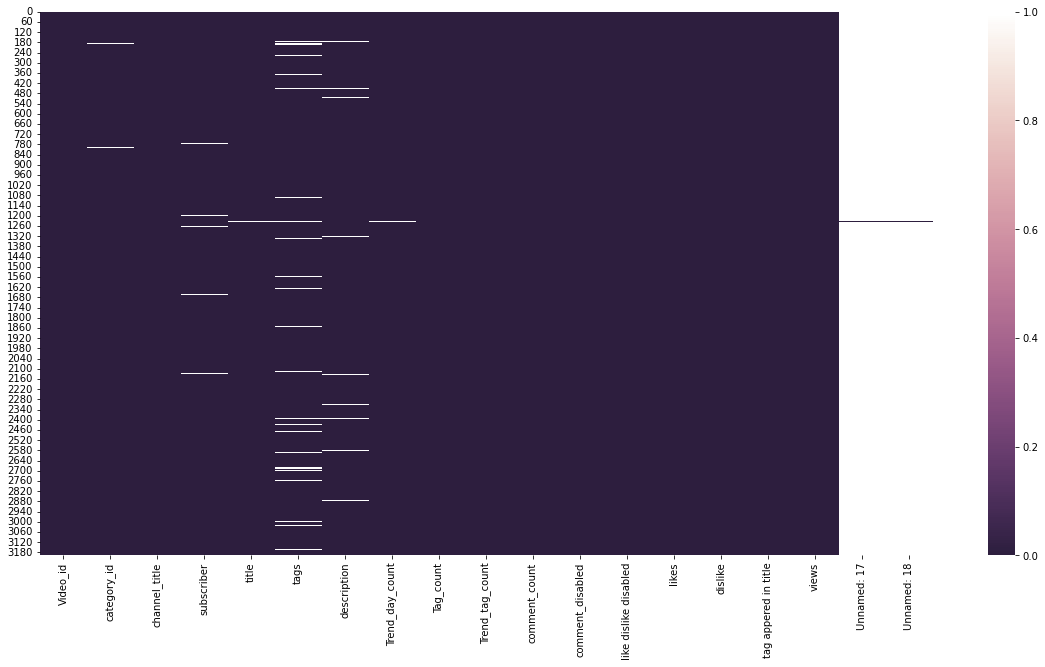

In [38]:
#visualizing missing values in heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df.isnull(), cmap=cmap)

In [5]:
#replacing 'na' by 'noaccess'
df['tags'].fillna('NoAccess',inplace=True)
df['description'].fillna('NoAccess',inplace=True)
df['subscriber'].fillna('NoAccess',inplace=True)


In [10]:
df.isnull().sum()

Video_id                    0
category_id                 6
channel_title               3
subscriber                  0
title                       3
tags                        0
description                 0
Trend_day_count             1
Tag_count                   1
Trend_tag_count             1
comment_count               0
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        1
views                       0
Unnamed: 17              3197
Unnamed: 18              3197
dtype: int64

In [6]:
#As the missing value for unnamed:17 and unnamed:18 is more we can remove them from dataset
del df['Unnamed: 17']
del df['Unnamed: 18']


In [12]:
#Checking if it removed or not
df.isnull().sum()


Video_id                 0
category_id              6
channel_title            3
subscriber               0
title                    3
tags                     0
description              0
Trend_day_count          1
Tag_count                1
Trend_tag_count          1
comment_count            0
comment_disabled         0
like dislike disabled    0
likes                    0
dislike                  0
tag appered in title     1
views                    0
dtype: int64

In [7]:
#Converting the categorical data into numerical

df['Tag_count'] =  pd.to_numeric(df['Tag_count'],errors='coerce')
df['Trend_tag_count'] =  pd.to_numeric(df['Trend_tag_count'],errors='coerce')
df['comment_count'] =  pd.to_numeric(df['comment_count'],errors='coerce')
df['likes'] =  pd.to_numeric(df['likes'],errors='coerce')
df['dislike'] =  pd.to_numeric(df['dislike'],errors='coerce')
df['views'] =  pd.to_numeric(df['views'],errors='coerce')

In [14]:
#Checking if the datatype changed

df.dtypes

Video_id                  object
category_id               object
channel_title             object
subscriber                object
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                float64
Trend_tag_count          float64
comment_count            float64
comment_disabled          object
like dislike disabled     object
likes                    float64
dislike                  float64
tag appered in title      object
views                    float64
dtype: object

In [19]:
df.describe()

,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,views
count,3197.000000,3196.000000,3195.000000,2183.000000,3.197000e+03,3197.000000,3.197000e+03
mean,7.964342,18.620776,7.119875,164789.284013,9.766148e+03,5784.686268,1.572121e+06
std,78.556055,80.379328,175.138956,81113.887992,2.240680e+04,4860.754493,2.053853e+07
min,0.000000,0.000000,1.000000,10.000000,0.000000e+00,0.000000,1.000000e+00
25%,4.000000,12.000000,2.000000,95358.000000,0.000000e+00,0.000000,4.305820e+05
50%,7.000000,17.000000,4.000000,163785.000000,1.022700e+04,5354.000000,7.081770e+05
75%,10.000000,21.000000,6.000000,238419.500000,1.505300e+04,10042.000000,1.204461e+06
max,4444.000000,3225.000000,9903.000000,299877.000000,1.213628e+06,14858.000000,9.898735e+08


In [ ]:
FROM THE ABOVE DESCRIPTION WE CAN FIND THAT "Trend_day_count,Tag_count,Trend_tag_count AND views" ARE HIGHLY SKEWED.
SO LET US PERFORM SKEW TO ALL THESE COLUMNS AND VISUALIZE THE VALUES.

In [20]:
#skew value of trend_day_count

df['Trend_day_count'].skew()

56.37807378711469

C:\Users\keert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Trend_day_count'>

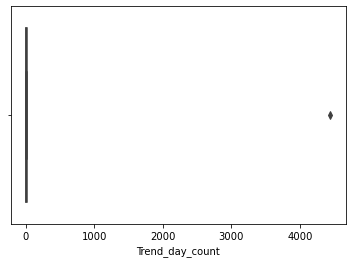

In [22]:
sn.boxplot(df['Trend_day_count'])

In [23]:
#skew value of tag_count

df['Tag_count'].skew()

39.70356242727037

C:\Users\keert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tag_count'>

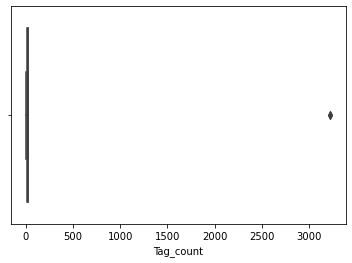

In [25]:
sn.boxplot(df['Tag_count'])

In [26]:
#skew value of trend_tag_count

df['Trend_tag_count'].skew()

56.513465727391065

C:\Users\keert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Trend_tag_count'>

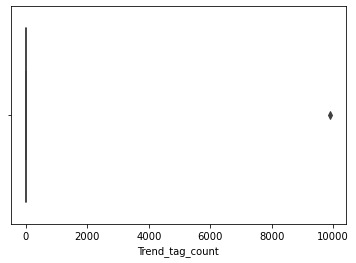

In [27]:
sn.boxplot(df['Trend_tag_count'])

In [ ]:
#skew value of views

df['views'].skew()

C:\Users\keert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='views'>

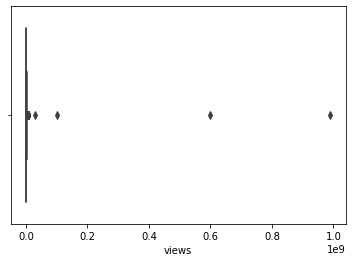

In [29]:
sn.boxplot(df['views'])

In [13]:
#removing the outliers based on highly skewed values
 
for x in ['Trend_day_count']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [12]:
#removing the outliers based on highly skewed values

for x in ['Trend_tag_count']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [11]:
#removing the outliers based on highly skewed values
 
for x in ['Tag_count']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [14]:
#removing the outliers based on highly skewed values
 
for x in ['views']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [15]:
df.isnull().sum()

Video_id                    0
category_id                 6
channel_title               3
subscriber                  0
title                       3
tags                        0
description                 0
Trend_day_count             1
Tag_count                   2
Trend_tag_count             3
comment_count            1015
comment_disabled            0
like dislike disabled       0
likes                       1
dislike                     1
tag appered in title        1
views                       1
dtype: int64

In [21]:
df['comment_count'].value_counts()

91013.0     3
38536.0     2
157352.0    2
267923.0    2
286423.0    2
           ..
42943.0     1
199322.0    1
24984.0     1
241812.0    1
32337.0     1
Name: comment_count, Length: 2173, dtype: int64

In [ ]:
WE CAN SEE THAT OUT OF 2173 DATA 1015 DATA VALUES ARE MISSING WITH THIS WE CANNOT FIND THE ACCURATE ANALYSIS
SO LETS REMOVE THE 'comment_count'

In [16]:
del df['comment_count']

<AxesSubplot:>

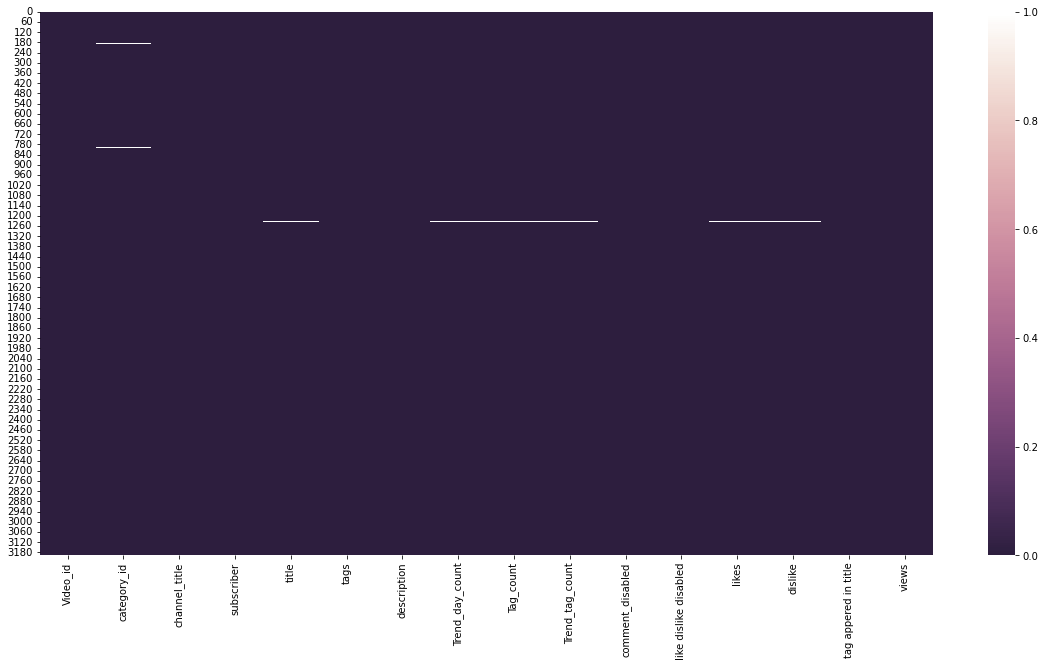

In [37]:
#Now lets visualize the missing value in heatmap

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df.isnull(), cmap=cmap)

In [ ]:
AS THE DATA MISSING FROM THE COLUMNS ARE LESS THAN 5% WE CAN REMOVE THOSE DATA FROM THE DATASET

In [23]:
# printing initial shape
print(df.shape)
df.dropna(inplace=True)

# final shape of the data with
# missing rows removed
print(df.shape)


(3198, 16)
(3181, 16)


In [67]:
#We have cleaned the dataset
df.isnull().sum()

Video_id                 0
category_id              0
channel_title            0
subscriber               0
title                    0
tags                     0
description              0
Trend_day_count          0
Tag_count                0
Trend_tag_count          0
comment_disabled         0
like dislike disabled    0
likes                    0
dislike                  0
tag appered in title     0
views                    0
dtype: int64

In [ ]:
NOW WE CAN PERFORM SOME ANALYSIS ON THE DATASET

In [70]:
correlation=df.corr()

<AxesSubplot:>

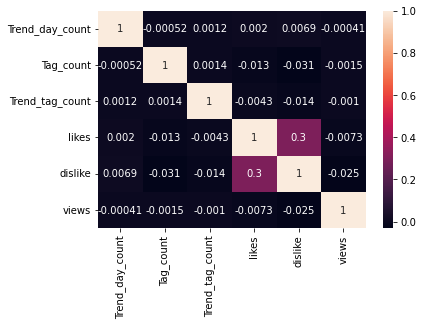

In [74]:
sn.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

array([[<AxesSubplot:title={'center':'Trend_day_count'}>,
        <AxesSubplot:title={'center':'Tag_count'}>],
       [<AxesSubplot:title={'center':'Trend_tag_count'}>,
        <AxesSubplot:title={'center':'likes'}>],
       [<AxesSubplot:title={'center':'dislike'}>,
        <AxesSubplot:title={'center':'views'}>]], dtype=object)

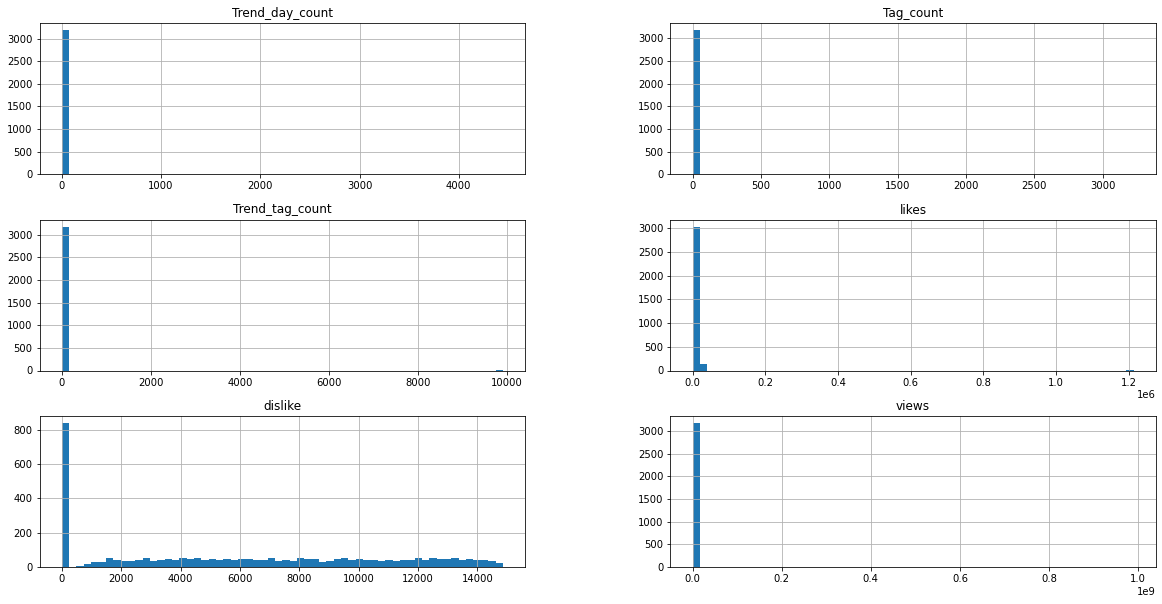

In [85]:
df.hist(bins=60,figsize=(20,10))

In [24]:
#Comparing the categorical variables 

counts=df.groupby(['subscriber','tags'],axis=0)
counts.size()


subscriber  tags                                                                                                                                                                                                                                                                                                                                                                                                                                                 
0.0         American Broadcasting Company|ABC|ABC Network|Television|TV|what to watch|trailer|tv show|Television Program|Taylor Swift|New Year's Day|Performance|Reputation                                                                                                                                                                                                                                                                                          1
            American Broadcasting Company|ABC|ABC Network|Television|TV|what to watch|trailer|t

<AxesSubplot:>

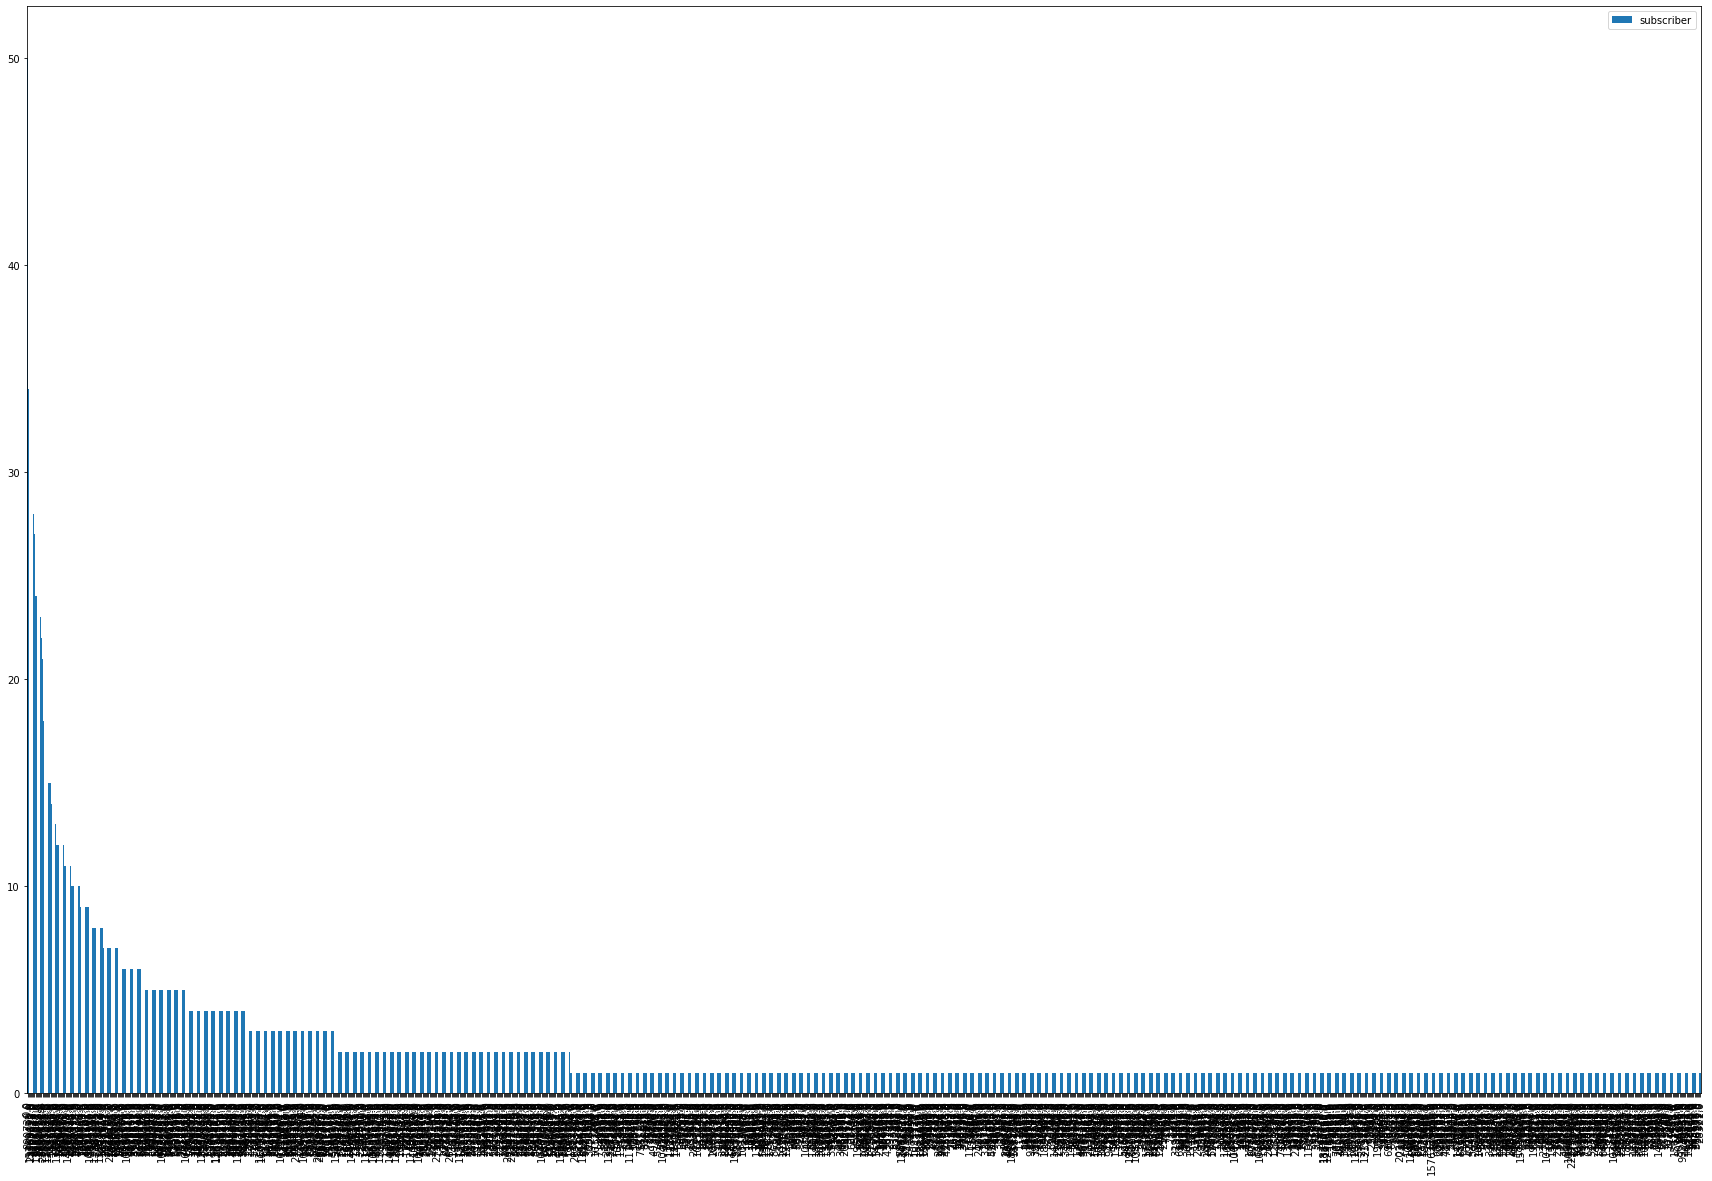

In [87]:
pd.DataFrame(df['subscriber'].value_counts()).plot(kind='bar', figsize=(30,20))

In [17]:
df.dtypes

Video_id                  object
category_id               object
channel_title             object
subscriber                object
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                float64
Trend_tag_count          float64
comment_disabled          object
like dislike disabled     object
likes                    float64
dislike                  float64
tag appered in title      object
views                    float64
dtype: object

In [24]:
#CHI SQUARE

h0='Subscriber and Likes are dependent'
ha='Subscriber and Likes are not dependent'
crosstab=pd.crosstab(df['subscriber'],df['likes'])
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
if p_value<0.05:
  print(f'{ha} as the p_value({p_value.round(3)})<0.05')
else:
  print(f'{h0} as the p_value({p_value.round(3)})>0.05')

Subscriber and Likes are dependent as the p_value(1.0)>0.05


In [25]:
#CHI SQUARE

h0='Title and Likes are dependent'
ha='Title and Likes are not dependent'
crosstab=pd.crosstab(df['title'],df['likes'])
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
if p_value<0.05:
  print(f'{ha} as the p_value({p_value.round(3)})<0.05')
else:
  print(f'{h0} as the p_value({p_value.round(3)})>0.05')

Title and Likes are dependent as the p_value(0.35)>0.05


In [26]:
#CHI SQUARE

h0='Trend_day_count and Likes are dependent'
ha='Trend_day_count and Likes are not dependent'
crosstab=pd.crosstab(df['Trend_day_count'],df['likes'])
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
if p_value<0.05:
  print(f'{ha} as the p_value({p_value.round(3)})<0.05')
else:
  print(f'{h0} as the p_value({p_value.round(3)})>0.05')

Trend_day_count and Likes are dependent as the p_value(0.997)>0.05


In [27]:
#CHI SQUARE

h0='Trend_tag_count and Likes are dependent'
ha='Trend_tag_coutand Likes are not dependent'
crosstab=pd.crosstab(df['Trend_tag_count'],df['likes'])
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
if p_value<0.05:
  print(f'{ha} as the p_value({p_value.round(3)})<0.05')
else:
  print(f'{h0} as the p_value({p_value.round(3)})>0.05')

Subscriber and Likes are not dependent as the p_value(0.0)<0.05


In [28]:
#CHI SQUARE

h0='Title and disLikes are dependent'
ha='Title and disLikes are not dependent'
crosstab=pd.crosstab(df['title'],df['dislike'])
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
if p_value<0.05:
  print(f'{ha} as the p_value({p_value.round(3)})<0.05')
else:
  print(f'{h0} as the p_value({p_value.round(3)})>0.05')

Title and disLikes are dependent as the p_value(0.168)>0.05


In [29]:
#CHI SQUARE

h0='Title and views are dependent'
ha='Title and views are not dependent'
crosstab=pd.crosstab(df['title'],df['views'])
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
if p_value<0.05:
  print(f'{ha} as the p_value({p_value.round(3)})<0.05')
else:
  print(f'{h0} as the p_value({p_value.round(3)})>0.05')

Title and views are dependent as the p_value(0.241)>0.05
